In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import to_rgba
import sys
import os
# adding Folder_2/subfolder to the system path
sys.path.insert(0, '/work/ccnr/glover.co/net_design/NetDesign')
import network_design as nd

In [225]:
def get_networks(parent_dir,component_num = 2):
    eco_networks = os.listdir(parent_dir)[1:]
    original_networks_files = [name for name in eco_networks if not (os.path.isdir(os.path.join(eco_path, name)) or name[0] == 'X')]
    original_X_files = [name for name in eco_networks if not (os.path.isdir(os.path.join(eco_path, name)) or name[0] != 'X')]
    original_networks = [nx.read_edgelist(eco_path + '/'+g,nodetype=int) for g in original_networks_files]
    Xs = [np.loadtxt(eco_path+ '/' + X) for X in original_X_files]
    # idx = [i for i,g in enumerate(original_networks) if nx.is_connected(g)]
    idx = np.arange(len(Xs))
    
    recon_dirs = [name for name in eco_networks if (os.path.isdir(os.path.join(eco_path, name)) and name[-1] == str(component_num))]
    return original_networks, original_networks_files, recon_dirs,idx, Xs

In [233]:
recon_dirs[0][:-8]

'g_architecture_lpub3d_000000'

In [239]:
eco_path = '/work/ccnr/glover.co/net_design/NetDesign/data/protein_complex/complex_portal/'
# eco_path = '/work/ccnr/glover.co/net_design/NetDesign/data/lego/networks/'
# eco_path = '/work/ccnr/glover.co/net_design/NetDesign/data/lattice_data/'
# eco_networks = os.listdir(eco_path)[1:]
# os.path.isdir(os.path.join(eco_networks, eco_networks[0]))
# [name for name in eco_networks if not os.path.isdir(os.path.join(eco_networks, name))]
networks, graph_names, recon_dirs, idx, Xs = get_networks(eco_path)

In [189]:
len(idx)

353

In [190]:
from itertools import compress

In [191]:
networks = list(compress(networks,idx))
graph_names = list(compress(graph_names,idx))
recon_dirs = list(compress(recon_dirs,idx))
Xs = list(compress(Xs,idx))

In [192]:
len(graph_names)

352

In [193]:
len(recon_dirs)

49

In [131]:
size

[0,
 0,
 7,
 8,
 88,
 61,
 0,
 29,
 3,
 7,
 6,
 40,
 5,
 2,
 18,
 168,
 43,
 9,
 13,
 9,
 6,
 30,
 29,
 3,
 21,
 6,
 2,
 2,
 5,
 33,
 13,
 10,
 6,
 5,
 8,
 96,
 10,
 20,
 99,
 32,
 172,
 77,
 25,
 52,
 191,
 121,
 32,
 50,
 101,
 48,
 114,
 78,
 30,
 54,
 124,
 40]

In [240]:
size = [g.number_of_nodes() for g in networks]


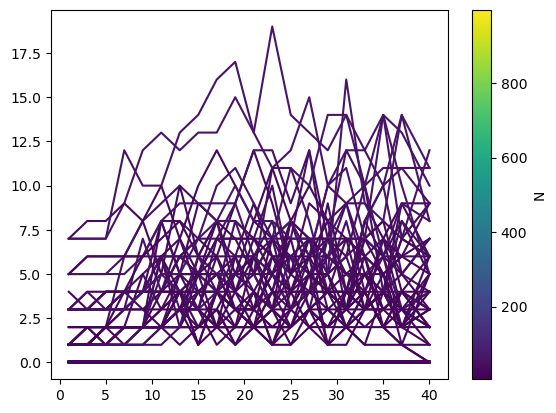

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
fig, ax = plt.subplots()
norm = mcolors.Normalize(vmin=min(size), vmax=max(size))
cmap = cm.viridis
for i in range(len(graph_names)):
    color = cmap(norm(size[i]))

    ax.plot(indices,num_components[:,i],color=color)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(size), vmax=max(size)))
plt.colorbar(sm, label='N',ax=ax)


In [203]:
num_components = np.zeros((len(recon_dirs),20))
num_particles = np.zeros(len(recon_dirs))
size = np.zeros(len(recon_dirs))
for i,cur_dir in enumerate(recon_dirs):
    graphs = [f for f in os.listdir(eco_path + cur_dir) if f[0] == 'g']
    if len(graphs) == 0:
        size[i] = 0
        num_components[i] = 0
        num_particles[i] = 0
        continue
    for g in graphs:
        detachment_rate = int(float(g[13:-4]))
        idx = np.where(detachment_rate == indices)[0]
        num_components[i,idx] = len(list(nx.connected_components(nx.read_edgelist(eco_path + cur_dir + '/' + g))))
    size[i] = nx.read_edgelist(eco_path + cur_dir + '/' + g).number_of_nodes()/2
    try:
        num_particles[i] = Xs[i].shape[1]
    except:
        num_particles[i] = 1

In [201]:
Xs[4]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [204]:
ratio = np.nan_to_num(num_particles / size)
ratio

/tmp/ipykernel_20693/2485277079.py:1: RuntimeWarning: divide by zero encountered in divide
  ratio = np.nan_to_num(num_particles / size)


array([1.00000000e+000, 6.66666667e-001, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 5.00000000e-001,
       1.00000000e+000, 5.00000000e-001, 1.79769313e+308, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 2.66666667e-001, 3.75000000e-001,
       2.85714286e-001, 1.79769313e+308, 1.00000000e+000, 1.00000000e+000,
       6.66666667e-001, 5.00000000e-001, 5.00000000e-001, 6.66666667e-001,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 5.00000000e-001,
       1.00000000e+000, 1.00000000e+000, 1.71428571e-001, 1.00000000e+000,
       2.50000000e-001, 1.00000000e+000, 1.00000000e+000, 5.00000000e-001,
       5.00000000e-001, 5.00000000e-001, 1.00000000e+000, 6.66666667e-001,
       1.00000000e+000, 1.00000000e+000, 6.66666667e-001, 1.00000000e+000,
       5.00000000e-001, 1.00000000e+000, 7.50000000e-001, 1.79769313e+308,
       5.00000000e-001, 3.33333333e-001])

/home/glover.co/miniconda3/envs/gt/lib/python3.12/site-packages/matplotlib/colors.py:1405: RuntimeWarning: overflow encountered in divide
  resdat /= (vmax - vmin)


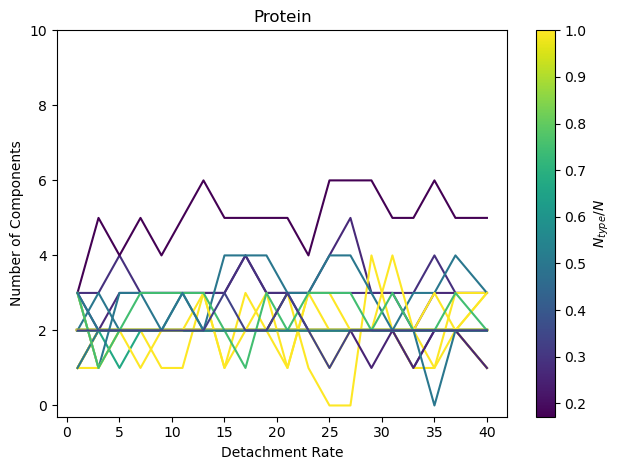

In [206]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
fig, ax = plt.subplots()
norm = mcolors.Normalize(vmin=min(ratio), vmax=1)
cmap = cm.viridis
for i in range(len(num_components)):
    color = cmap(norm(ratio[i]))
    if num_components[i,0] == 0:
        continue
    ax.plot(indices,num_components[i],color=color)
ax.set_yticks(np.arange(0,12,2),np.arange(0,12,2))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(ratio), vmax=1))
plt.colorbar(sm, label='$N_{type}/N$',ax=ax)
plt.title('Protein')
plt.xlabel('Detachment Rate')
plt.ylabel('Number of Components')
plt.tight_layout()
plt.savefig('../protein_num_comp_hetero.png')
plt.show()

In [245]:
num_isomorphisms = np.zeros((len(recon_dirs),20))
num_particles = np.zeros(len(recon_dirs))
size = np.zeros(len(recon_dirs))
for i,cur_dir in enumerate(recon_dirs):
    true_network = nx.read_edgelist(eco_path + cur_dir[:-9] + '.edge')
    graphs = [f for f in os.listdir(eco_path + cur_dir) if f[0] == 'g']
    if len(graphs) == 0:
        size[i] = 0
        num_components[i] = 0
        num_particles[i] = 0
        continue
    for g in graphs:
        detachment_rate = int(float(g[13:-4]))
        idx = np.where(detachment_rate == indices)[0]
        cur_g = nx.read_edgelist(eco_path + cur_dir + '/' + g)
        components = list(nx.connected_components(cur_g))
        for c in components:
            num_isomorphisms[i,idx] += nx.is_isomorphic(true_network,nx.subgraph(cur_g,c))
        num_isomorphisms[i,idx] /= 2
    size[i] = nx.read_edgelist(eco_path + cur_dir + '/' + g).number_of_nodes()/2
    try:
        num_particles[i] = Xs[i].shape[1]
    except:
        num_particles[i] = 1

In [244]:
recon_dirs[0][:-8]

'CPX-10041.'

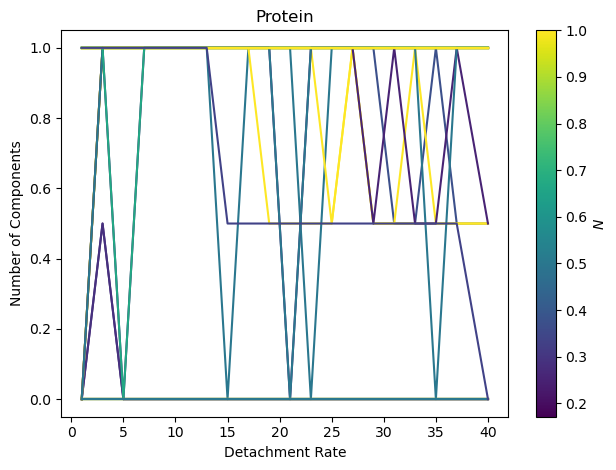

In [247]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
fig, ax = plt.subplots()
norm = mcolors.Normalize(vmin=min(ratio), vmax=1)
cmap = cm.viridis
for i in range(len(num_components)):
    color = cmap(norm(ratio[i]))
    ax.plot(indices,num_isomorphisms[i],color=color)
# ax.set_yticks(np.arange(0,1,2),np.arange(0,1,2))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(ratio), vmax=1))
plt.colorbar(sm, label='$N$',ax=ax)
plt.title('Protein')
plt.xlabel('Detachment Rate')
plt.ylabel('Number of Components')
plt.tight_layout()
plt.savefig('../protein_iso_comp.png')
plt.show()

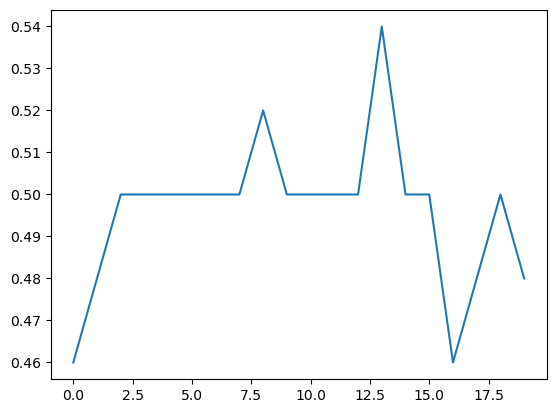

In [250]:
plt.plot(num_components.mean(axis=0))

In [47]:
max_comp = np.zeros((len(dirs),20))
for i, cur_dir in enumerate(dirs):
    new_networks = os.listdir(eco_path + cur_dir)
    try:
        for j, comp in enumerate(new_networks[:20]):
            comp_sizes = np.loadtxt(eco_path+cur_dir+'/'+comp)
            max_comp[i,j] = np.max(comp_sizes) / 
    except:
        max_comp[i] = np.nan

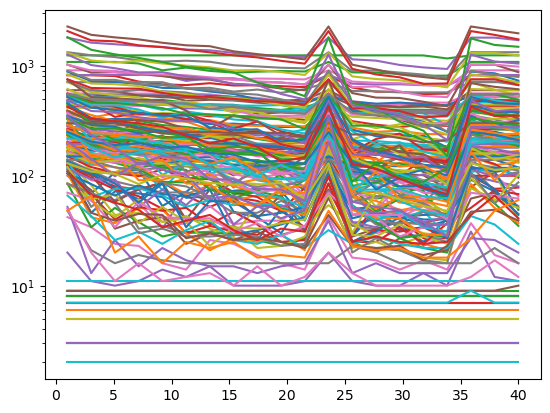

In [50]:
for i in range(len(dirs)):
    plt.semilogy(np.linspace(1,40,20),max_comp[i])

In [ ]:
max_iso = np.zeros((len(dirs),20))
for i, cur_dir in enumerate(dirs):
    # Get original network
    original_network = nx.read_edgelist(eco_path + cur_dir[:-6] + '.txt',edgetype=str,delimiter=',')
    new_networks = os.listdir(eco_path + cur_dir)
    counter = 0
    for g_file in new_networks:
        try:
            g = nx.read_edgelist(eco_path + cur_dir + '/' + g_file)
                # Get connected components
            components = list(nx.connected_components(g))
            iso_count = 0
            for c in components:
                iso_count += nx.is_isomorphic(original_network,nx.subgraph(g,c))
            max_iso[i,counter] = iso_count
            counter += 1
        except:
            continue

        

In [ ]:
max_iso